In [173]:
import pandas as pd 
import plotly.express as px 
from pywt import wavedec, idwt
import plotly.graph_objects as go
import pywt
import matplotlib.pyplot as plt
import numpy as np

In [174]:
df = pd.read_csv('pepe.csv',header=0)

In [175]:
df['closex10'] = df['Close'] * 1000000

In [176]:
# Convertir "Open time" y "Close time" a datetime y darle formato ISO 8601
df['Open time_date'] = pd.to_datetime(df['Open time'], unit='ms').apply(lambda x: x.isoformat())
df['Close time_date'] = pd.to_datetime(df['Close time'], unit='ms').apply(lambda x: x.isoformat())

In [177]:
df = df[['Close time_date','closex10']]#.head()

In [178]:
df.tail()

,Close time_date,closex10
15335,2025-02-02T17:59:59.999000,11.11
15336,2025-02-02T18:59:59.999000,10.83
15337,2025-02-02T19:59:59.999000,10.93
15338,2025-02-02T20:59:59.999000,10.83
15339,2025-02-02T21:59:59.999000,10.59


In [99]:
df.describe()

,closex10
count,15317.000000
mean,6.766505
std,6.365108
min,0.610000
25%,1.200000
50%,6.750000
75%,10.350000
max,27.470000


In [79]:
print(df['Close time_date'].min(),df['Close time_date'].max())

2023-05-05T18:59:59.999000 2025-02-01T22:59:59.999000


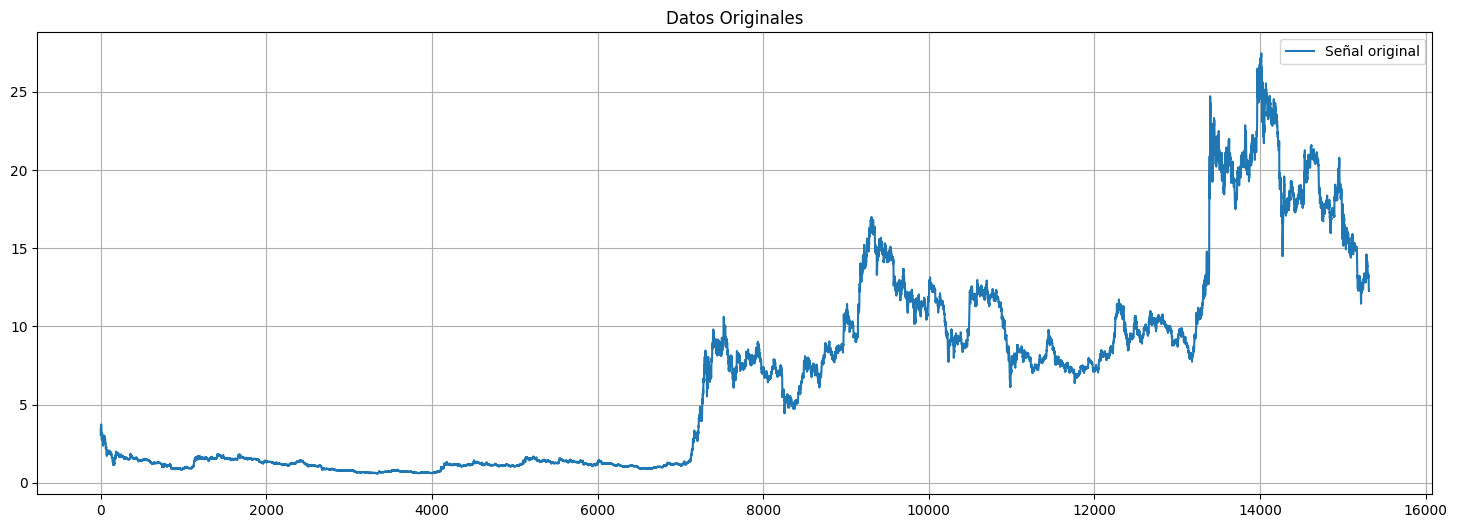

In [80]:
plt.figure(figsize=(18,6))
plt.plot(df['closex10'], label='Señal original')
plt.title("Datos Originales")
plt.legend()
plt.grid()

In [90]:
import setuptools.dist

In [91]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


In [93]:
df

,Close time_date,closex10
0,2023-05-05T18:59:59.999000,3.07
1,2023-05-05T19:59:59.999000,3.35
2,2023-05-05T20:59:59.999000,3.52
3,2023-05-05T21:59:59.999000,3.20
4,2023-05-05T22:59:59.999000,3.33
...,...,...
15312,2025-02-01T18:59:59.999000,12.91
15313,2025-02-01T19:59:59.999000,12.78
15314,2025-02-01T20:59:59.999000,12.45
15315,2025-02-01T21:59:59.999000,12.33


In [138]:
                                                                                     # Función para crear datos con ventana deslizante
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])  # Ventana de entrada
        y.append(data[i+window_size])    # Valor a predecir
    return np.array(X), np.array(y)

# Definir el tamaño de la ventana
window_size = 20

# Crear datos en formato ventana deslizante
X, y = create_sequences(df['closex10'], window_size)


In [139]:
# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape para que sea compatible con LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [140]:
#Crear modelo LSTM
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(window_size, 1)),  # Primera capa LSTM
    LSTM(50, activation='relu', return_sequences=True),  # Segunda capa LSTM
    LSTM(25, activation='relu', return_sequences=False), # Última capa LSTM sin return_sequences
    Dense(1)  # Capa densa para la salida
])

# Compilar modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [141]:
# Entrenar modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Hacer predicciones
predictions = model.predict(X_test)

Epoch 1/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 3.3723 - mae: 0.7438 - val_loss: 1.0344 - val_mae: 0.6898
Epoch 2/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.8896 - mae: 0.3664 - val_loss: 10.4463 - val_mae: 1.8973
Epoch 3/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.0660 - mae: 0.1474 - val_loss: 5.1173 - val_mae: 1.1219
Epoch 4/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 0.0567 - mae: 0.1336 - val_loss: 1.7061 - val_mae: 0.8810
Epoch 5/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0459 - mae: 0.1248 - val_loss: 0.4224 - val_mae: 0.4375
Epoch 6/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0314 - mae: 0.1056 - val_loss: 0.1780 - val_mae: 0.2826
Epoch 7/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0341 - mae: 0.1092 - val_loss: 0.2279 - val_mae: 0.2970
Epoch 8/10
765/765 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.0200 - mae: 0.0850 - val_loss: 0.4051 - val_mae: 0.3875
Epoch 9/10
765/765 ━━━━━━━━━━━━━━━━━━━━

383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


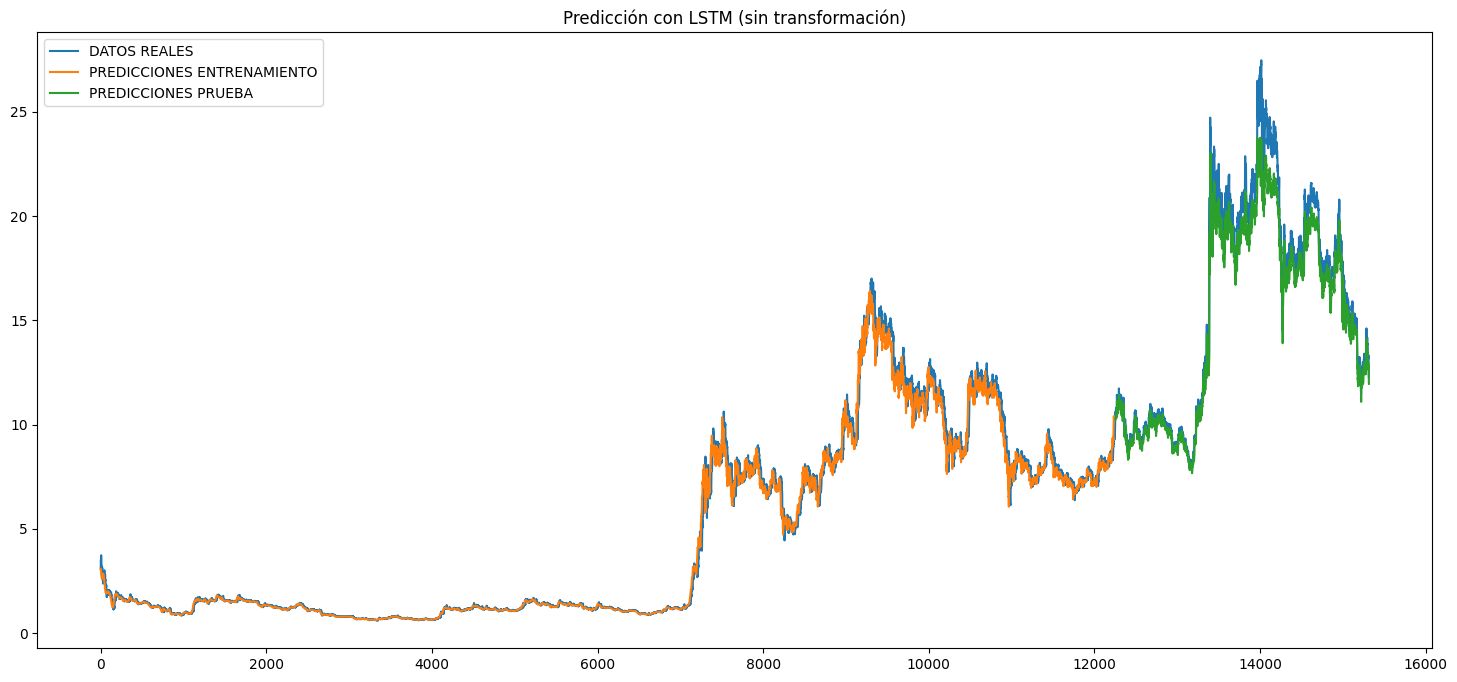

In [142]:
# Graficar resultados
plt.figure(figsize=(18, 8))
plt.plot(df['closex10'], label="DATOS REALES")
plt.plot(model.predict(X_train), label="PREDICCIONES ENTRENAMIENTO")
plt.plot(range(len(X_train) + 20, len(df.closex10)),model.predict(X_test), label="PREDICCIONES PRUEBA")
plt.legend()
plt.title("Predicción con LSTM (sin transformación)")
plt.show()

In [130]:
df.head()

,Close time_date,closex10
0,2023-05-05T18:59:59.999000,3.07
1,2023-05-05T19:59:59.999000,3.35
2,2023-05-05T20:59:59.999000,3.52
3,2023-05-05T21:59:59.999000,3.20
4,2023-05-05T22:59:59.999000,3.33


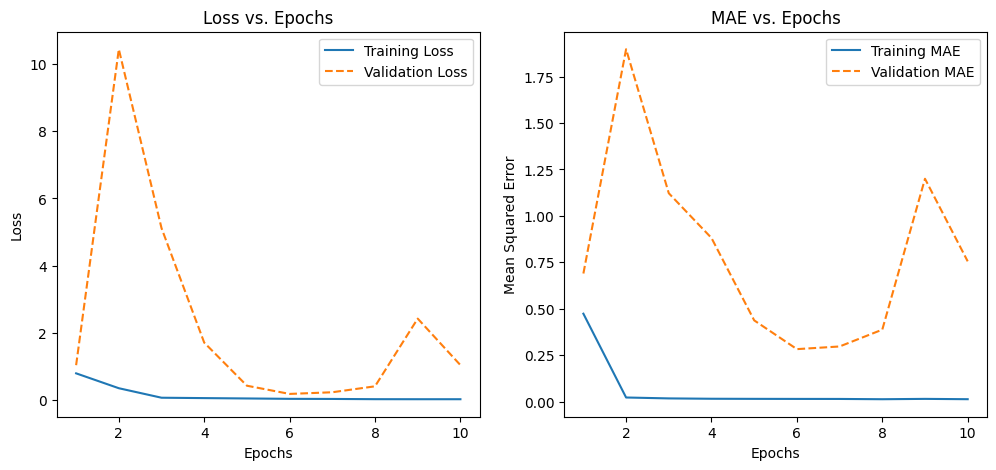

In [143]:
import matplotlib.pyplot as plt

# Obtener los valores de loss y mse del historial de entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae'] if 'mae' in history.history else None
val_mae = history.history['val_mae'] if 'val_mae' in history.history else None

epochs = range(1, len(loss) + 1)

# Graficar la pérdida (Loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', linestyle="dashed")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Graficar el error cuadrático medio (MSE) si está disponible
if mae is not None:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mse, label='Training MAE')
    plt.plot(epochs, val_mae, label='Validation MAE', linestyle="dashed")
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.title('MAE vs. Epochs')
    plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


C:\Users\mefis\AppData\Local\Temp\ipykernel_7256\413429256.py:20: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

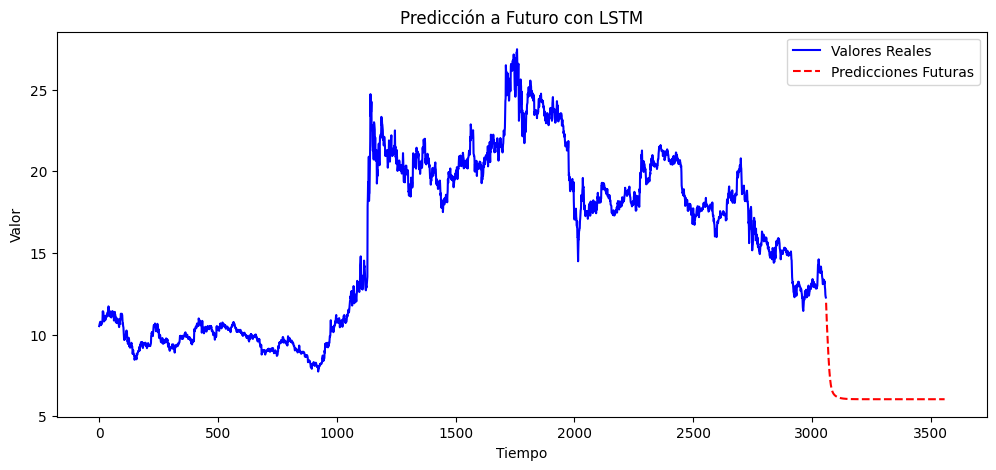

In [144]:
# Definir cuántos pasos hacia adelante queremos predecir
future_steps = 500  # Puedes cambiar este valor según lo necesites

# Tomar la última ventana de datos usada en el entrenamiento
last_window = X_test[-1]  # Última ventana usada en el modelo

# Asegurar que la ventana tiene la forma correcta para la LSTM (1, window_size, 1)
last_window = last_window.reshape(1, last_window.shape[0], 1)

# Lista para almacenar las predicciones futuras
future_predictions = []

# Generar predicciones en cascada
for _ in range(future_steps):
    pred = model.predict(last_window)  # Predecir el siguiente valor
    future_predictions.append(pred[0, 0])  # Guardar la predicción

    # Desplazar la ventana: eliminar el primer valor y agregar la nueva predicción
    last_window = np.roll(last_window, shift=-1, axis=1)
    last_window[0, -1, 0] = pred  # Reemplazar el último valor con la predicción

# Convertir a un array de numpy
future_predictions = np.array(future_predictions)

# Graficar la serie original y las predicciones futuras
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(range(len(y_test)), y_test, label="Valores Reales", color='blue')
plt.plot(range(len(y_test), len(y_test) + future_steps), future_predictions, label="Predicciones Futuras", color='red', linestyle="dashed")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.title("Predicción a Futuro con LSTM")
plt.legend()
plt.show()


In [179]:
dfp = df.copy()
dfp.columns = ['ds', 'y']
dfp.ds = pd.to_datetime(dfp.ds)

In [180]:
from prophet import Prophet

# Crear modelo Prophet
model = Prophet(changepoint_prior_scale=1)

# Entrenar modelo con los datos
model.fit(dfp)


17:25:23 - cmdstanpy - INFO - Chain [1] start processing
17:25:31 - cmdstanpy - INFO - Chain [1] done processing


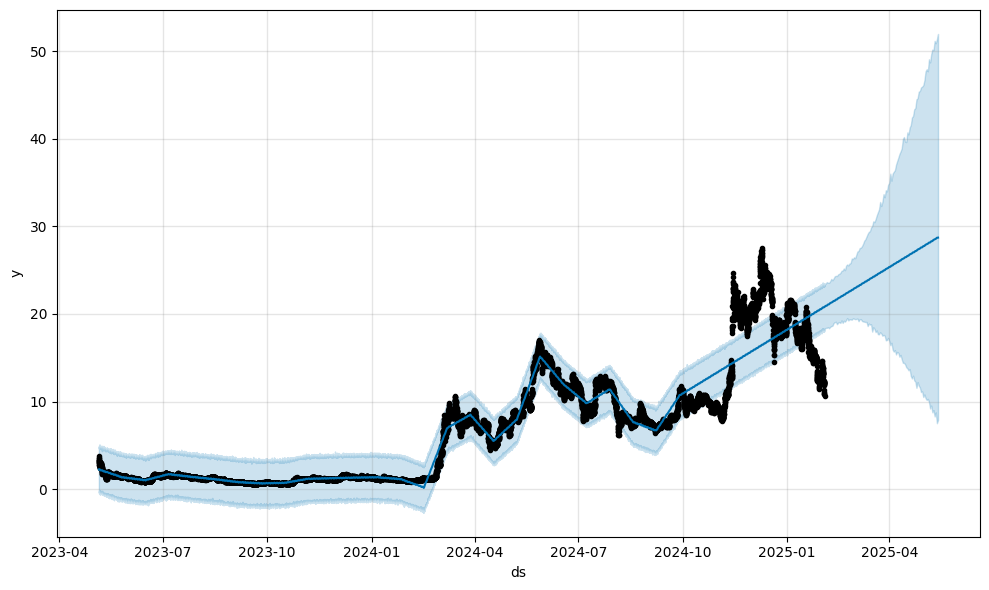

In [181]:
# Definir horizonte de predicción (ejemplo: 100 días)
future = model.make_future_dataframe(periods=100)

# Hacer predicciones
forecast = model.predict(future)

# Graficar predicciones
fig = model.plot(forecast)
plt.show()


In [172]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-05-05 18:59:59.999,2.243483,-0.374896,4.656553,2.243483,2.243483,0.006879,0.006879,0.006879,-0.005426,-0.005426,-0.005426,0.012305,0.012305,0.012305,0.0,0.0,0.0,2.250362
1,2023-05-05 19:59:59.999,2.241668,-0.232014,4.959023,2.241668,2.241668,0.005731,0.005731,0.005731,-0.010541,-0.010541,-0.010541,0.016271,0.016271,0.016271,0.0,0.0,0.0,2.247399
2,2023-05-05 20:59:59.999,2.239853,-0.230046,4.829570,2.239853,2.239853,0.008469,0.008469,0.008469,-0.011628,-0.011628,-0.011628,0.020097,0.020097,0.020097,0.0,0.0,0.0,2.248322
3,2023-05-05 21:59:59.999,2.238038,-0.315913,4.970902,2.238038,2.238038,0.016918,0.016918,0.016918,-0.006820,-0.006820,-0.006820,0.023738,0.023738,0.023738,0.0,0.0,0.0,2.254956
4,2023-05-05 22:59:59.999,2.236223,-0.329947,4.843347,2.236223,2.236223,0.028959,0.028959,0.028959,0.001808,0.001808,0.001808,0.027151,0.027151,0.027151,0.0,0.0,0.0,2.265182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15435,2025-05-09 21:59:59.999,28.432555,8.288798,51.541791,8.063104,51.422099,0.016918,0.016918,0.016918,-0.006820,-0.006820,-0.006820,0.023738,0.023738,0.023738,0.0,0.0,0.0,28.449473
15436,2025-05-10 21:59:59.999,28.511868,8.215232,51.743135,7.730685,51.933210,-0.002147,-0.002147,-0.002147,-0.006820,-0.006820,-0.006820,0.004673,0.004673,0.004673,0.0,0.0,0.0,28.509721
15437,2025-05-11 21:59:59.999,28.591180,7.959057,52.022924,7.600742,52.351159,-0.019799,-0.019799,-0.019799,-0.006820,-0.006820,-0.006820,-0.012978,-0.012978,-0.012978,0.0,0.0,0.0,28.571381
15438,2025-05-12 21:59:59.999,28.670493,8.159711,52.727311,7.507767,52.851375,0.021596,0.021596,0.021596,-0.006820,-0.006820,-0.006820,0.028416,0.028416,0.028416,0.0,0.0,0.0,28.692088


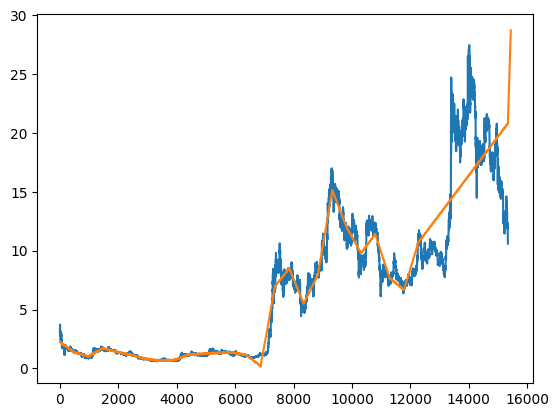

In [171]:
plt.plot(df['closex10'], label="DATOS REALES")
plt.plot(forecast['yhat'], label="DATOS REALES")
plt.show()

In [36]:
coeffs = wavedec(df['closex10'],'db1',level=3,mode='symmetric')
#cA2, cD2, cD1 = coeffs

# Inversa de wavelet 

In [42]:
# Reconstruir señales a partir de los coeficientes
reconstructed_approximation = pywt.upcoef('a', coeffs[0], 'db1', level=3, take=len(df))
reconstructed_details = [
    pywt.upcoef('d', coeffs[1:][i], 'db1', level=(3 - i), take=len(df)) for i in range(2)
]

In [57]:
df.shape

(15317, 2)

In [43]:
len(reconstructed_approximation)

15317

In [44]:
len(reconstructed_details[0])

15317

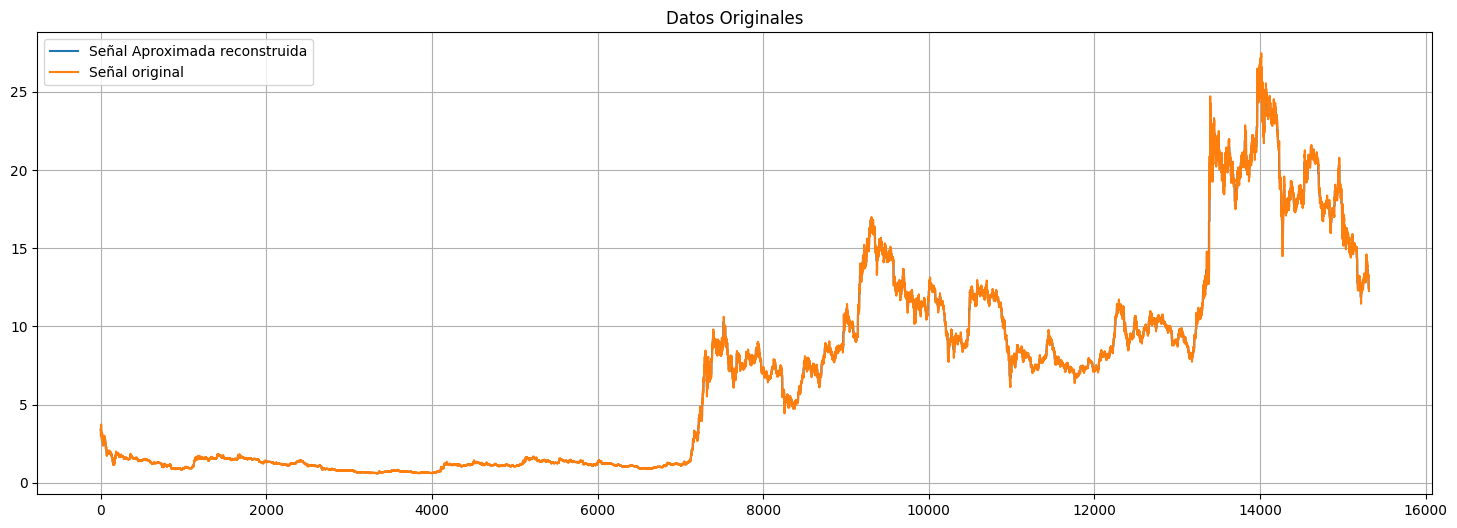

In [46]:
plt.figure(figsize=(18,6))
#plt.plot(reconstructed_approximation+reconstructed_details[0]+reconstructed_details[1], label="Señal reconstruida")
plt.plot(reconstructed_approximation, label="Señal Aproximada reconstruida")
plt.plot(df['closex10'], label='Señal original')
plt.title("Datos Originales")
plt.legend()
plt.grid()

In [70]:
reconstructed_approximation

array([ 3.3775 ,  3.3775 ,  3.3775 , ..., 12.44375, 12.44375, 12.44375],
      shape=(15317,))

In [72]:
coeffs[0]

array([ 3.83044057,  4.20623662,  3.95413737,  4.82600623,  2.21911474,
        9.55809777, 24.55471722, 28.25570697])

In [66]:
df.head()

,Close time_date,closex10
0,2023-05-05T18:59:59.999000,3.07
1,2023-05-05T19:59:59.999000,3.35
2,2023-05-05T20:59:59.999000,3.52
3,2023-05-05T21:59:59.999000,3.20
4,2023-05-05T22:59:59.999000,3.33


c:\Users\mefis\Desktop\MAESTRIA DE INTELIGENCIA ARTIFICIAL\TFM\ambiente_tfm\Lib\site-packages\pywt\_multilevel.py:43: UserWarning:

Level value of 15 is too high: all coefficients will experience boundary effects.



Aproximación:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 1:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 2:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 3:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 4:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 5:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 6:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 7:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 8:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 9:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 10:
  Energía: 0.0000
  Varianza: 0.0000
------------------------------
Detalle Nivel 11:
  Energía: 0.0000
  Varianza: 0.0000
------------

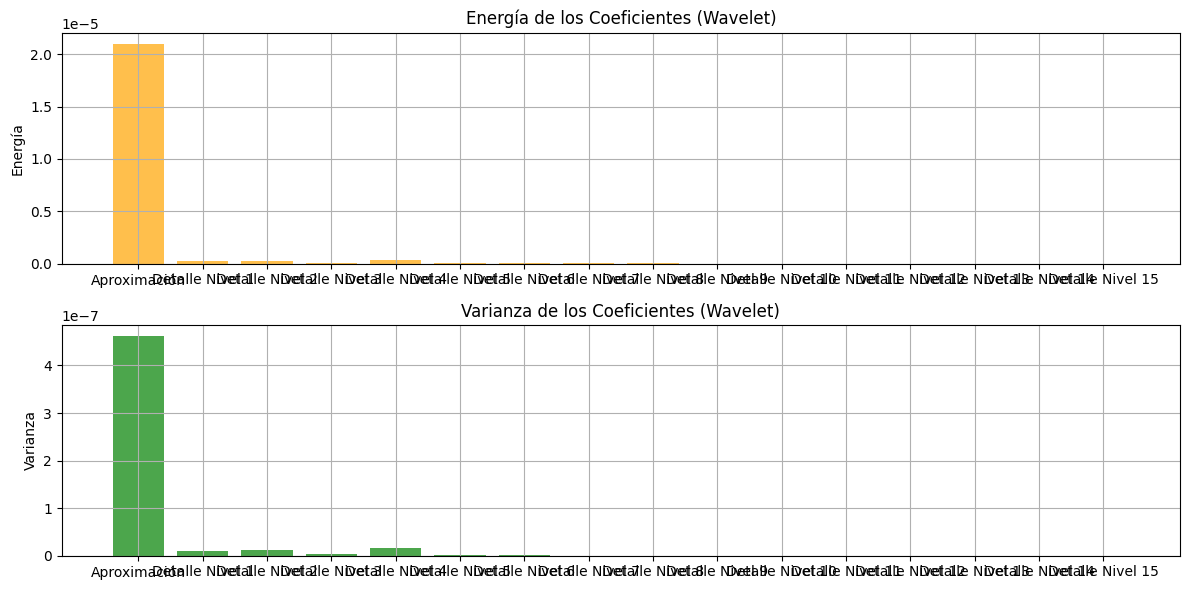

In [69]:
# Transformada de Wavelet (3 niveles)
wavelet = "db10"
coeffs = pywt.wavedec(df['Close'], wavelet=wavelet, level=15)  # 3 niveles

# Inicializar listas para almacenar resultados
energies = []
variances = []
level_labels = []

# Analizar cada conjunto de coeficientes (aproximación + detalles)
for i, coeff in enumerate(coeffs):
    level_name = "Aproximación" if i == 0 else f"Detalle Nivel {i}"
    energy = np.sum(np.square(coeff))  # Energía
    variance = np.var(coeff)           # Varianza

    # Almacenar resultados
    energies.append(energy)
    variances.append(variance)
    level_labels.append(level_name)

    print(f"{level_name}:")
    print(f"  Energía: {energy:.4f}")
    print(f"  Varianza: {variance:.4f}")
    print("-" * 30)

# Visualización de Energía y Varianza
plt.figure(figsize=(12, 6))

# Energía
plt.subplot(2, 1, 1)
plt.bar(level_labels, energies, color="orange", alpha=0.7)
plt.title("Energía de los Coeficientes (Wavelet)")
plt.ylabel("Energía")
plt.grid()

# Varianza
plt.subplot(2, 1, 2)
plt.bar(level_labels, variances, color="green", alpha=0.7)
plt.title("Varianza de los Coeficientes (Wavelet)")
plt.ylabel("Varianza")
plt.grid()

plt.tight_layout()
plt.show()

In [56]:
from scipy.fftpack import fft, fftfreq

fs = 1  # Frecuencia de muestreo (ajústala según tus datos)
N = len(df['closex10'])  # Número de muestras

# Aplicar la FFT
X_fft = fft(df['closex10'])
freqs = fftfreq(N, d=1/fs)  # Eje de frecuencia

# Graficar el espectro de frecuencia
plt.plot(freqs[:N//2], np.abs(X_fft[:N//2]))  # Solo la mitad positiva
plt.title("Espectro de Frecuencia de la Señal")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.show()


KeyError: 'ALIGNED'

In [14]:
inv_coeffs = idwt(cA2,cD2,'db1',mode='symmetric')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Close time_date'],y=df['closex10'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(x=df['Close time_date'],y=inv_coeffs,
                    mode='lines',
                    name='idwt'))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed